In [98]:
import pandas as pd
import requests
import matplotlib_inline
import matplotlib.pyplot as plt
import numpy as np

In [86]:
# Load GUS data xlsx
excel = 'Data/zgony_wedlug_tygodni/Zgony wedąug tygodni w Polsce_2021.xlsx'
d21 = pd.read_excel(excel)
d21

,TABL.,"ZGONY WEDŁUG TYGODNI ORAZ WIEKU, PŁCI ZMARŁYCH I 73 PODREGIONÓW",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
0,Rok :,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,POLSKA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Ogółem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,UWAGA: Dane w trakcie opracowania. W poszczegó...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wiek zmarłych\nw latach,Podregiony,NaN,Tydzień roku wg ISO8601,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,90 i więcej,PL922,Ciechanowski,23,21,16,16,16,16,19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1963,90 i więcej,PL923,Płocki,21,13,14,18,18,15,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1964,90 i więcej,PL924,Ostrołęcki,24,26,30,22,17,21,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1965,90 i więcej,PL925,Siedlecki,16,21,21,22,24,19,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# Removing first 5 rows
d21pl = d21.iloc[5:8,1:55]
d21pl

,"ZGONY WEDŁUG TYGODNI ORAZ WIEKU, PŁCI ZMARŁYCH I 73 PODREGIONÓW",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
5,NaN,NaN,T01,T02,T03,T04,T05,T06,T07,T08,...,T43,T44,T45,T46,T47,T48,T49,T50,T51,T52
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,PL,Polska,11466,10966,11013,10380,9877,9922,10112,9890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
d21pl.columns = d21pl.iloc[0]
d21pl = d21pl.drop(d21pl.index[1])
d21pl = d21pl.drop(d21pl.index[0])
d21pl

5,NaN,NaN,T01,T02,T03,T04,T05,T06,T07,T08,...,T43,T44,T45,T46,T47,T48,T49,T50,T51,T52
7,PL,Polska,11466,10966,11013,10380,9877,9922,10112,9890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#drop nan columns
# rename column name
d21pl = d21pl.dropna(axis=1, how='all')
d21pl = d21pl.rename(columns = {d21pl.columns[0] : "Country"})
d21pl = d21pl.drop(columns = d21pl.columns[0])
d21pl


5,T01,T02,T03,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15,T16,T17,T18
7,11466,10966,11013,10380,9877,9922,10112,9890,10149,10816,11547,12586,13706,13647,12662,11819,10709,9127


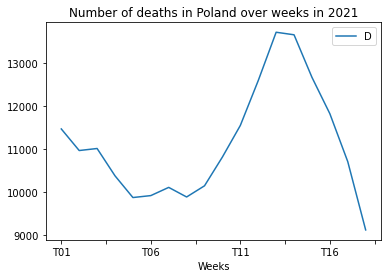

In [117]:
# Transpose 
d21plT = d21pl.T
# Insert padding

d21plT.plot()

# Customize the plot
plt.xlabel("Weeks")
plt.title("Number of deaths in Poland over weeks in 2021")
plt.legend("Deaths total")
plt.show()

In [6]:
d21.loc[d21.iloc[:,1] == 'PL51']

,TABL.,"ZGONY WEDŁUG TYGODNI ORAZ WIEKU, PŁCI ZMARŁYCH I 73 PODREGIONÓW",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54
42,Ogółem,PL51,Dolnośląskie,856,829,885,837,740,796,737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,0 - 4,PL51,Dolnośląskie,2,3,2,2,3,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,5 - 9,PL51,Dolnośląskie,0,0,1,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,10 - 14,PL51,Dolnośląskie,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434,15 - 19,PL51,Dolnośląskie,0,1,0,2,2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,20 - 24,PL51,Dolnośląskie,4,0,1,1,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
630,25 - 29,PL51,Dolnośląskie,2,1,2,4,2,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,30 - 34,PL51,Dolnośląskie,8,7,5,2,2,2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
826,35 - 39,PL51,Dolnośląskie,7,8,9,5,5,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
924,40 - 44,PL51,Dolnośląskie,14,14,16,10,11,8,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
